# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [13]:
# Notebooks specific imports
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic useful imports
import re
import time
import yaml
from pprint import pprint
from pathlib import Path
import h5py

# Data manipulation
import numpy as np
from scipy.special import erf
from scipy.integrate import quad
import scipy.stats as stats
from scipy.signal import savgol_filter

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import (Circle, RegularPolygon, FancyArrowPatch, ArrowStyle)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
import matplotlib.colors as colors

# From AMSOS_analysis.py
import amsos_analysis as aa
from amsos_analysis.colormaps import register_cmaps

### Style settings

In [89]:
graph_sty = {
    "axes.titlesize": 20,
    "axes.labelsize": 24,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "font.size": 20,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(graph_sty)
        

In [6]:
register_cmaps()
#plt.rcParams['image.cmap'] = 'emct8'
#plt.rcParams['image.cmap'] = 'warm'
plt.rcParams['image.cmap'] = 'YlOrRd'
#plt.rcParams['image.cmap'] = 'twilight'
#plt.rcParams['image.cmap'] = 'coolwarm'
#plt.rcParams['image.cmap'] = 'RdYlBu_r'

### Location

In [7]:
ws_path = Path('/home/alamson/DATA/Chromatin/')
mnt_path = Path.home() / 'projects/DATA/Chromatin/'
ceph_path = Path.home() / 'ceph/DATA/Chromatin/'

# Functions

In [68]:
def contiguous_regions(condition):
    """By Joe Kington, Finds contiguous True regions of the boolean array
    "condition". Returns a 2D array where the first column is the start
    index of the region and the second column is the end index.
    http://stackoverflow.com/questions/4494404/find-large-number-of-consecutive-values-fulfilling-condition-in-a-numpy-array"""

    # Find the indices of changes in "condition"
    diff = np.diff(condition.astype(int))
    idx, = diff.nonzero()

    # We need to start things after the change in "condition". Therefore,
    # we'll  shift the index by 1 to the right.
    idx += 1

    if condition[0]:
        # if the end of the start of condition is True prepend a 0
        idx = np.r_[0, idx]

    if condition[-1]:
        # if the end of condtion is True, append the length of the array
        idx = np.r_[idx, condition.size]

    idx.shape = (-1, 2)
    return idx

def collect_contiguous_intervals(arr, delta):
    """ Collect and return different contiguous regions of an array. """
    arr_deriv = np.gradient(arr, delta)

    # Get a matrix of indices. First column is starting point of positive
    # interval, second column is ending point of positive interval
    contig_idx_arr = contiguous_regions(arr_deriv > 0)
    start_pos = contig_idx_arr[:, 0]
    end_pos = contig_idx_arr[:, 1]
    pos_lengths = (end_pos - start_pos) * 1.
    neg_lengths = (start_pos[1:] - end_pos[:-1]) * 1.

    return arr_deriv, contig_idx_arr, pos_lengths, neg_lengths

# Results/Graphs

## 21-10-18_aLchr1_line700_2xsticky_conf

5401


/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_analysis.py:290: RuntimeWarning: divide by zero encountered in log
  return np.log(contact_map.mean(axis=-1))
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_graph_funcs.py:243: RuntimeWarning: divide by zero encountered in log
  np.log(contact_mat[:, :, -1]), vmin=vmin)


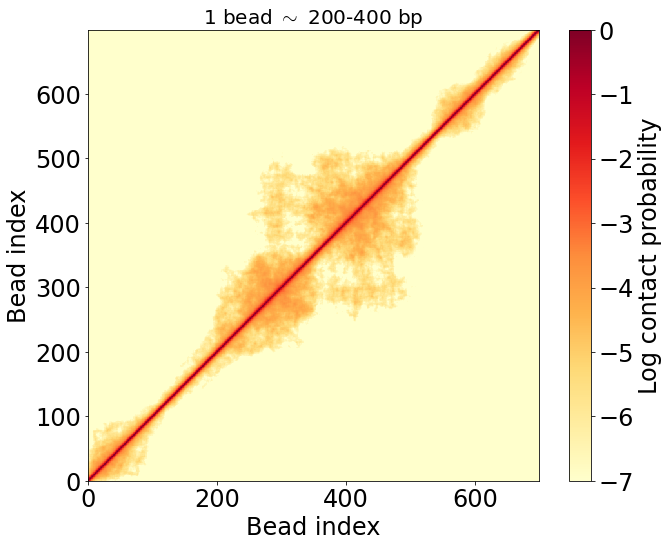

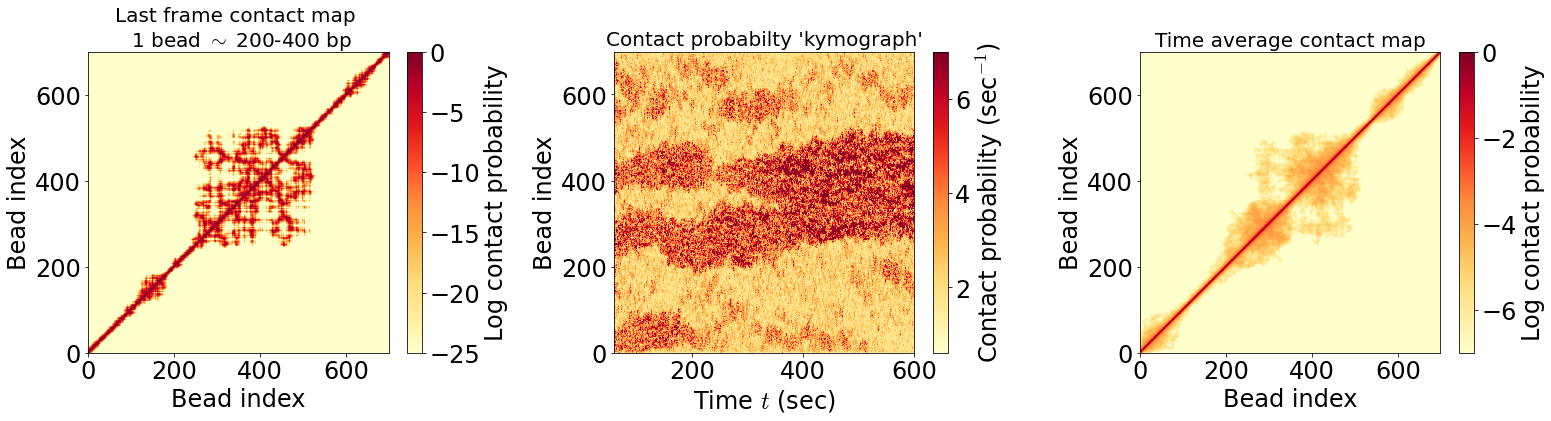

In [8]:
data_path = (ws_path /"21-10-18_aLchr1_line700_2xsticky_conf")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = -1
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])

log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)

# Graphing
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)

contact_mat = aa.gauss_weighted_contact(sep_dist_mat)
fig2, axarr2, contact_kymo = aa.make_summed_contact_kymo_graph(contact_mat[:,:,:end_ind], time_arr, vmin=-25, vmax=7, avg_contact_map=log_contact_avg_mat)

In [121]:
data_path = (ws_path /"21-10-18_aLchr1_line700_2xsticky_conf")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = -1
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    # Get force

5401


In [53]:
bead_window = 101
time_window = 1001
bead_smoothed_contact_kymo = savgol_filter(contact_kymo, bead_window, 3, axis=0)
time_smoothed_contact_kymo = savgol_filter(contact_kymo, time_window, 3, axis=1)
total_smoothed_contact_kymo = savgol_filter(bead_smoothed_contact_kymo, time_window, 3, axis=-1)
total_tf_smoothed_contact_kymo = savgol_filter(time_smoothed_contact_kymo, bead_window, 3, axis=0)

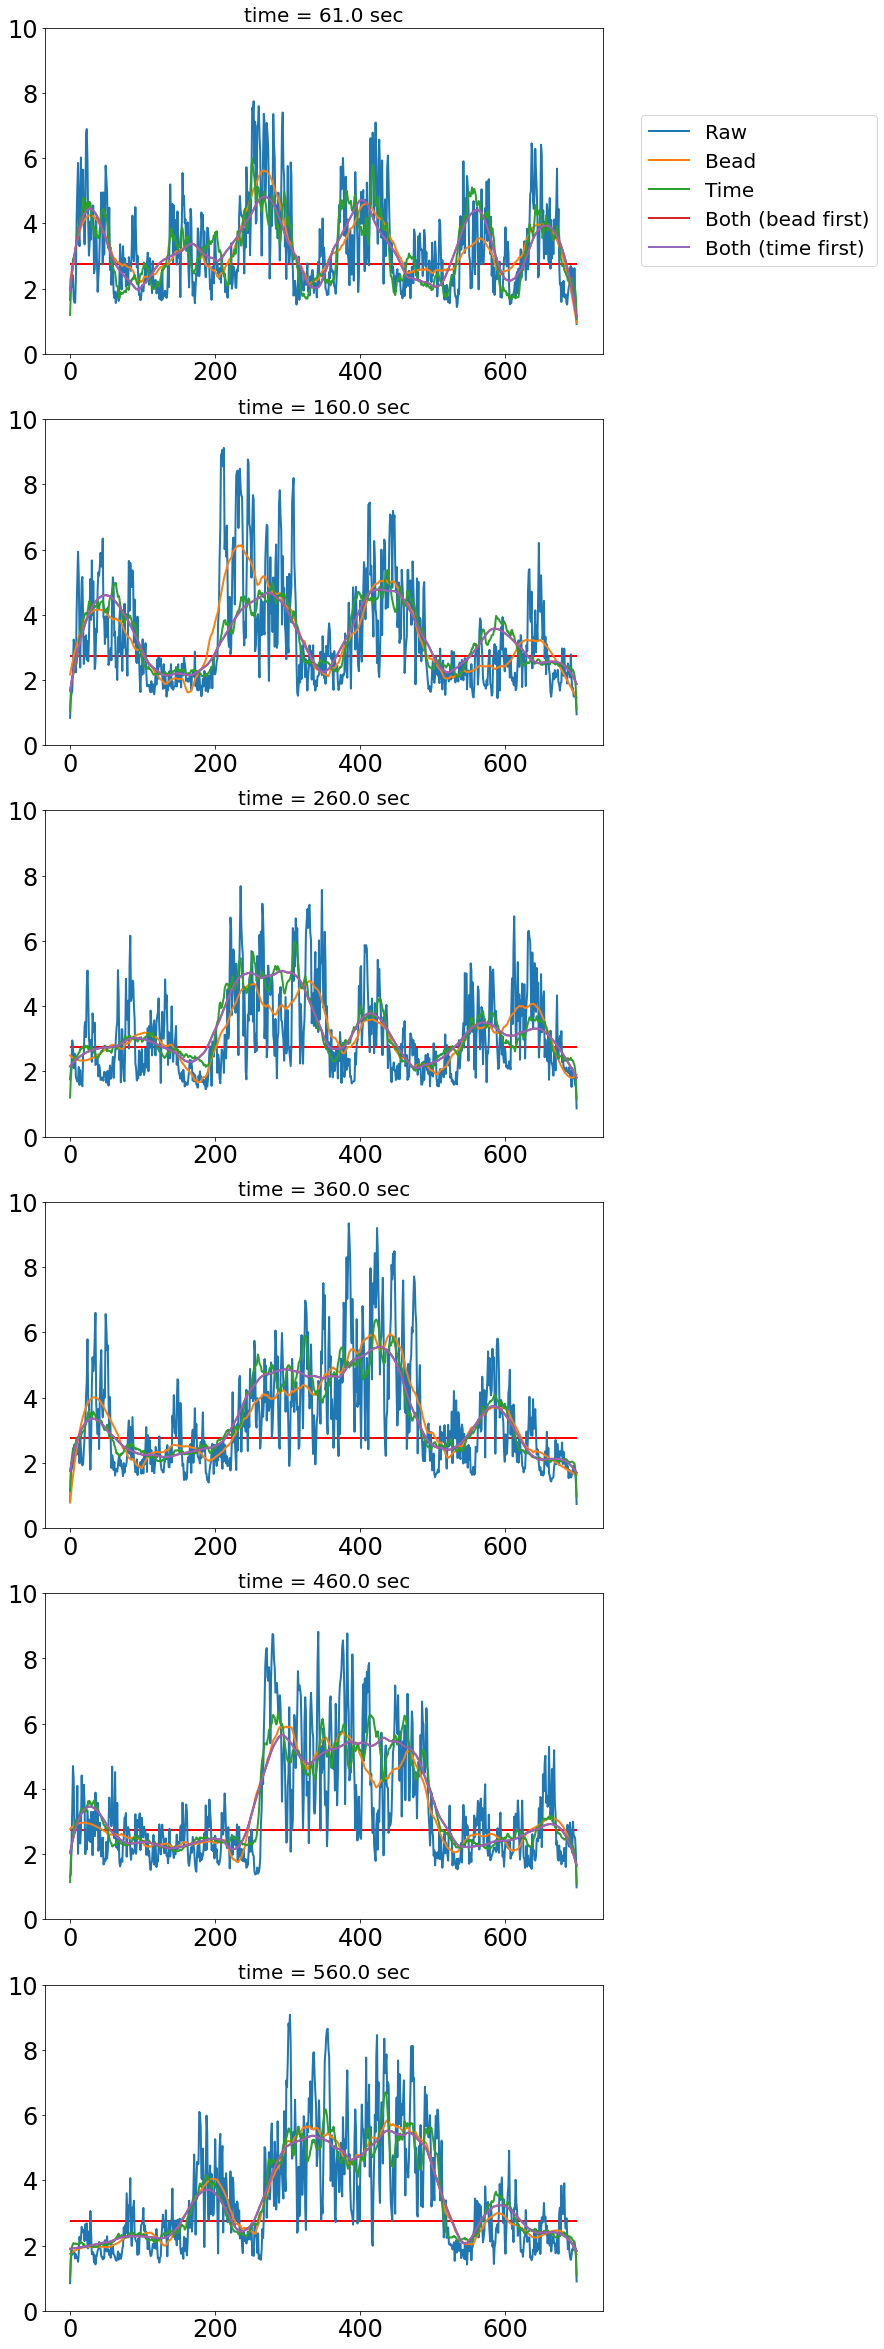

In [64]:
times = [10, 1000, 2000, 3000, 4000, 5000]
nt = len(times)
fig, axarr = plt.subplots(nt, 1, figsize=(10, 7*nt))
filter_window = 101
#t = 1000
#smoothed_contact_kymo = savgol_filter(contact_kymo[:, t], filter_window, 3)

for i, t in enumerate(times):
    _ = axarr[i].set_title(f'time = {time_arr[t+1]} sec')
    _ = axarr[i].plot(contact_kymo[:, t], label= "Raw")
    _ = axarr[i].plot(bead_smoothed_contact_kymo[:,t], label='Bead')
    _ = axarr[i].plot(time_smoothed_contact_kymo[:,t], label='Time')
    _ = axarr[i].plot(total_smoothed_contact_kymo[:,t], label='Both (bead first)')
    _ = axarr[i].plot(total_tf_smoothed_contact_kymo[:,t], label='Both (time first)')
    _ = axarr[i].hlines(2.75, 0, 699, color='r')
    _ = axarr[i].set_ylim(0, 10)
_ = axarr[0].legend(loc='center left', bbox_to_anchor=(1.05, .5))

In [116]:
threshold = 2.75
scatter_edge_coords = []
condensate_num_arr = []
for i, t in enumerate(time_arr):
    edges_inds = contiguous_regions(total_smoothed_contact_kymo[:, i] > threshold) 
    condensate_num_arr += [len(edges_inds)]
    for start, end in edges_inds:
        scatter_edge_coords += [[t, start, end]]
        
scatter_edge_coords = np.asarray(scatter_edge_coords)
condensate_num_arr = np.asarray(condensate_num_arr)

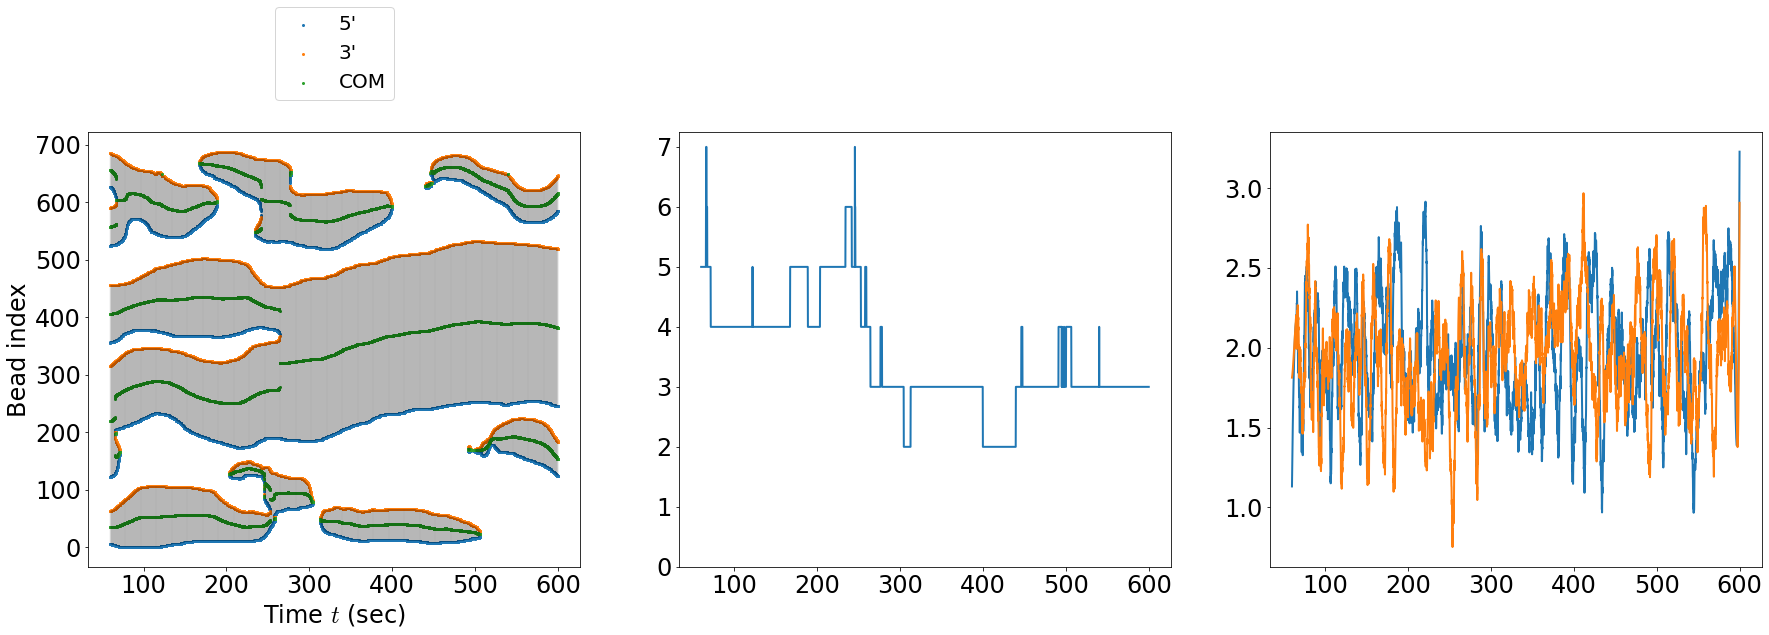

In [130]:
fig, axarr = plt.subplots(1,3, figsize=(30, 8))
_ = axarr[0].scatter(scatter_edge_coords[:,0], scatter_edge_coords[:,1], label = '5\'')
_ = axarr[0].scatter(scatter_edge_coords[:,0], scatter_edge_coords[:,2], label = '3\'')
_ = axarr[0].scatter(scatter_edge_coords[:,0], scatter_edge_coords[:,1] + .5 * (scatter_edge_coords[:,2]-scatter_edge_coords[:,1]),label='COM')
_ = axarr[0].vlines(scatter_edge_coords[:,0], scatter_edge_coords[:,1], scatter_edge_coords[:,2],color='k', alpha=.01)
_ = axarr[0].legend(loc='lower center', bbox_to_anchor=(.5, 1.05))
_ = axarr[0].set_xlabel("Time $t$ (sec)")
_ = axarr[0].set_ylabel("Bead index")
_ = axarr[1].plot(time_arr, condensate_num_arr)
_ = axarr[1].set_ylim(0)

data_path = (ws_path /"21-10-18_aLchr1_line700_2xsticky_conf")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = -1
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    tension_arr = aa.get_link_tension(h5_data)[:,ss_ind:end_ind]
_ = axarr[2].plot(time_arr, savgol_filter(tension_arr[0,:], bead_window, 3, axis=0))
_ = axarr[2].plot(time_arr,  savgol_filter(tension_arr[-1,:], bead_window, 3, axis=0))

Text(0.5, 0, 'Time $t$ (sec)')

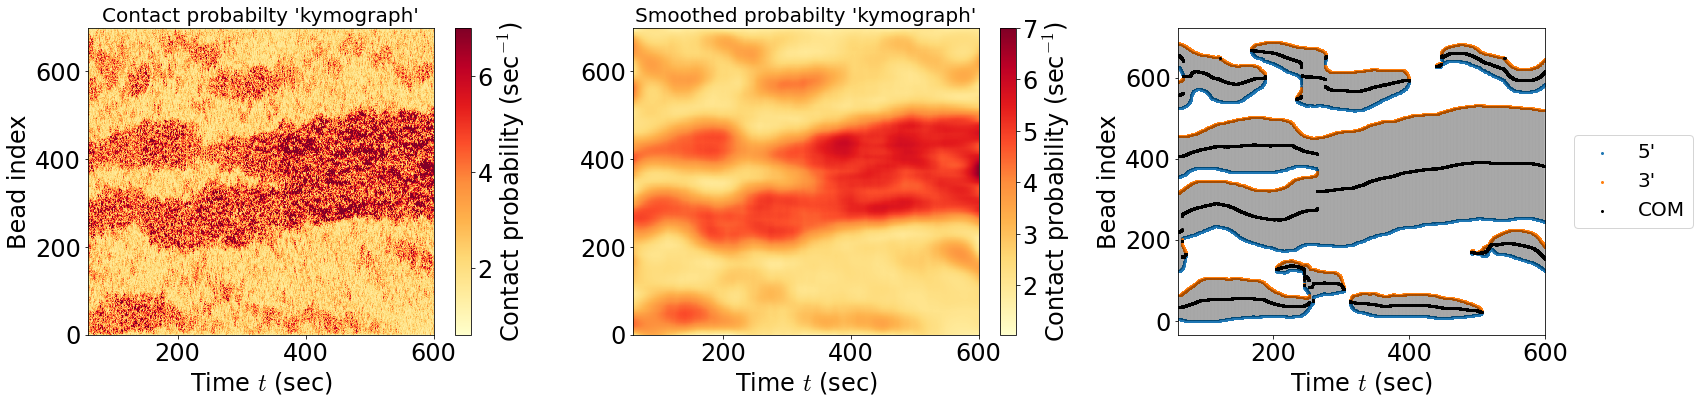

In [114]:
data_path = (ws_path /"21-10-18_aLchr1_line700_2xsticky_conf")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = -1

with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    
#fig, axarr = plt.subplots(1, 3, figsize=(24, 6))
fig, axarr = plt.subplots(1, 3, figsize=(24, 6), gridspec_kw={'width_ratios': [1, 1, .85]})
y = np.arange(total_smoothed_contact_kymo.shape[0] + 1)
# Add extra time point
x = np.append(time_arr, [time_arr[-1] + time_arr[2] - time_arr[1]])
X, Y = np.meshgrid(x, y)

c0 = axarr[0].pcolorfast(X, Y, contact_kymo, vmax=7)
_ = fig.colorbar(c0, ax=axarr[0],
                 label=r"Contact probability (sec$^{-1}$)")
_ = axarr[0].set_title(
    "Contact probabilty 'kymograph'")
_ = axarr[0].set_xlabel("Time $t$ (sec)")
_= axarr[0].set_ylabel("Bead index")

c1 = axarr[1].pcolorfast(X, Y, total_smoothed_contact_kymo, vmax=7)
_ = fig.colorbar(c1, ax=axarr[1],
                 label=r"Contact probability (sec$^{-1}$)")
_ = axarr[1].set_title(
    "Smoothed probabilty 'kymograph'")
axarr[1].set_xlabel("Time $t$ (sec)")
#axarr[1].set_ylabel("Bead index")

_ = axarr[2].scatter(scatter_edge_coords[:,0], scatter_edge_coords[:,1], label = '5\'')
_ = axarr[2].scatter(scatter_edge_coords[:,0], scatter_edge_coords[:,2], label = '3\'')
_ = axarr[2].scatter(scatter_edge_coords[:,0], scatter_edge_coords[:,1] + .5 * (scatter_edge_coords[:,2]-scatter_edge_coords[:,1]),color='k', label='COM')
_ = axarr[2].vlines(scatter_edge_coords[:,0], scatter_edge_coords[:,1], scatter_edge_coords[:,2],color='k', alpha=.01)
_ = axarr[2].legend(loc='center left', bbox_to_anchor=(1.05, .5))
_ = axarr[2].set_xlabel("Time $t$ (sec)")
_ = axarr[2].set_ylabel("Bead index")
_ = axarr[2].set_xlim(time_arr[0],600)
#_ = axarr[2].set_aspect('equal')
fig.tight_layout()

901


/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_analysis.py:290: RuntimeWarning: divide by zero encountered in log
  return np.log(contact_map.mean(axis=-1))
/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_graph_funcs.py:243: RuntimeWarning: divide by zero encountered in log
  np.log(contact_mat[:, :, -1]), vmin=vmin)


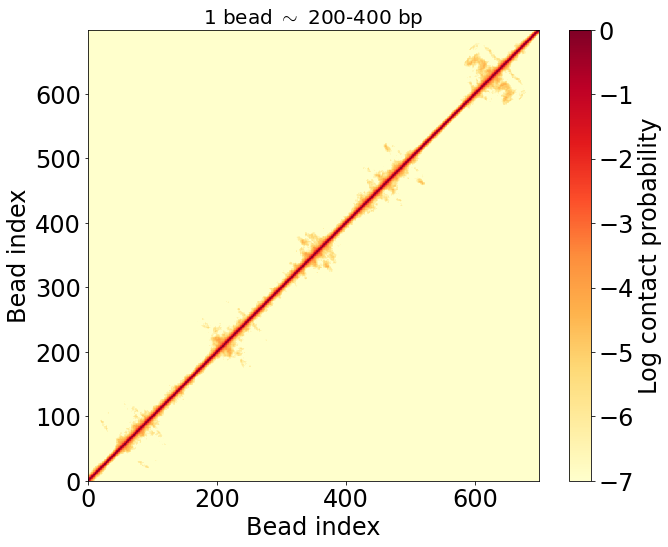

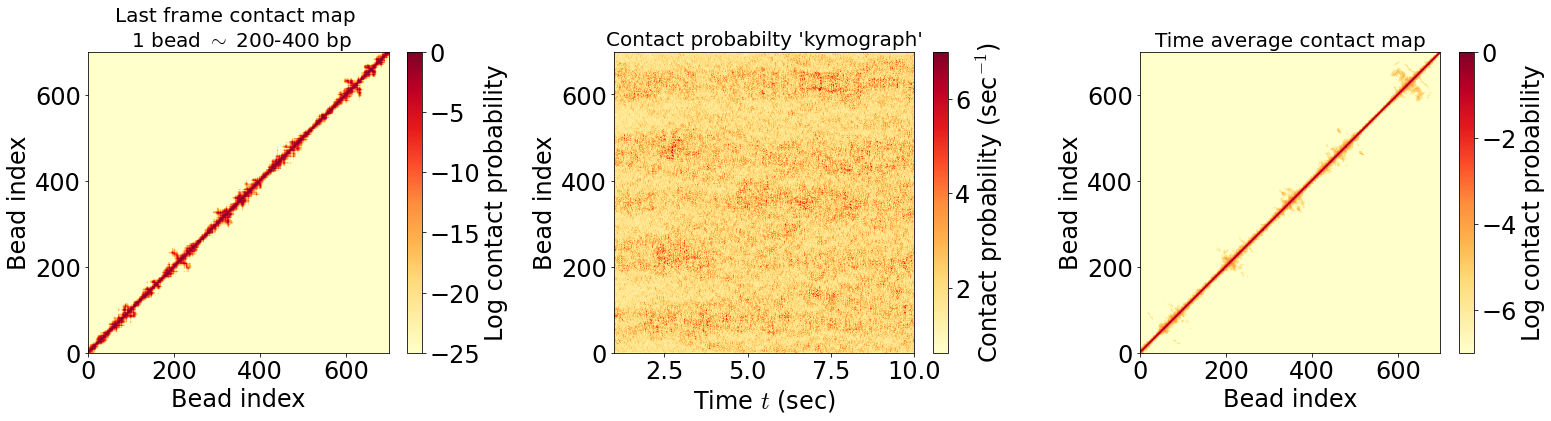

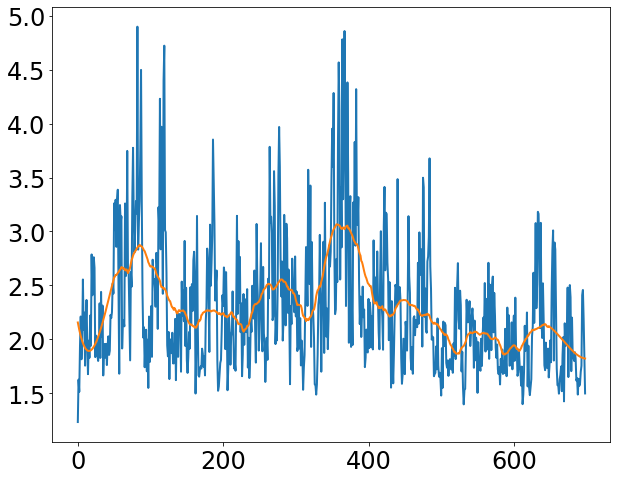

In [15]:
data_path = (ceph_path /"21-09-01_aLchr1_line700_conf")
ss_ind = 100
end_ind = -1
start_bead = 0
end_bead = -1
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])

log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)

# Graphing
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)

contact_mat = aa.gauss_weighted_contact(sep_dist_mat)
fig2, axarr2, contact_kymo1 = aa.make_summed_contact_kymo_graph(contact_mat[:,:,:end_ind], time_arr, vmin=-25, vmax=7, avg_contact_map=log_contact_avg_mat)


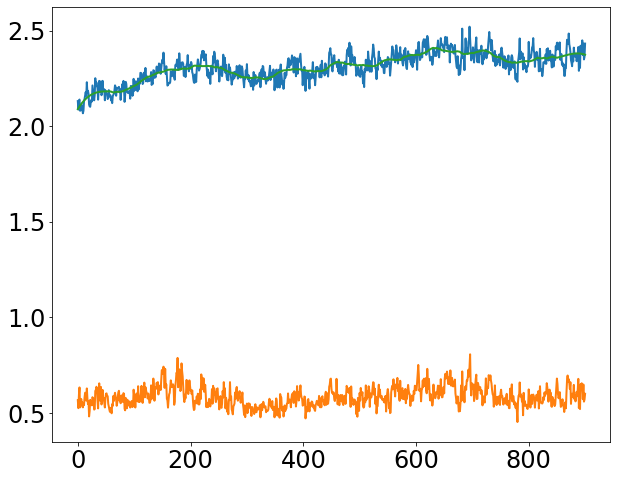

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
filter_window = 101
smoothed_contact_kymo1 = savgol_filter(np.mean(contact_kymo1, axis=0), filter_window, 3)
ax.plot(np.mean(contact_kymo1, axis=0))
ax.plot(np.std(contact_kymo1, axis=0))
ax.plot(smoothed_contact_kymo1)
#ax.set_ylim(0, 10)

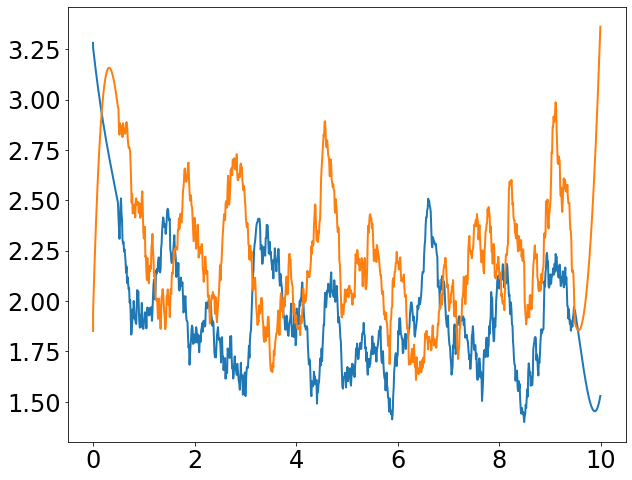

In [128]:
data_path_test = (ceph_path /"21-09-01_aLchr1_line700_conf")
ss_ind = 0
end_ind = -1
start_bead = 0
end_bead = -1
with h5py.File(next(data_path_test.glob('*.h5')), 'r+') as h5_data:
    time_arr1 = h5_data['time'][ss_ind:end_ind]
    tension_arr1 = aa.get_link_tension(h5_data)[:,ss_ind:end_ind]
fig, ax = plt.subplots(figsize=(10, 8))
_ = ax.plot(time_arr1, savgol_filter(tension_arr1[0,:], bead_window, 3, axis=0))
_ = ax.plot(time_arr1,  savgol_filter(tension_arr1[-1,:], bead_window, 3, axis=0))

# Kymograph

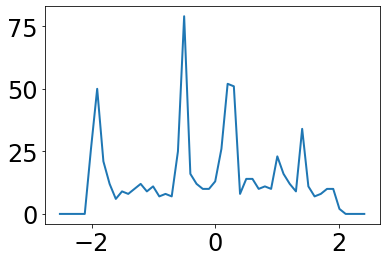

In [155]:
data_path = (ws_path /"21-10-18_aLchr1_line700_2xsticky_conf")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = -1

with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    params = yaml.safe_load(h5_data.attrs['RunConfig'])
    sim_box_low = np.asarray(params['simBoxLow'])
    sim_box_high = np.asarray(params['simBoxHigh'])
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    proj_vec = com_arr[-1,:,0] - com_arr[0,:,0] 
    proj_vec /= np.linalg.norm(proj_vec)
    proj_arr = np.einsum('ijk,j->ik', com_arr, proj_vec)
    range_min = np.dot(sim_box_low, proj_vec)
    range_max = np.dot(sim_box_high, proj_vec)
hist, bin_edges = np.histogram(proj_arr[:, 1000], bins=50, range=(range_min, range_max))
plt.plot(bin_edges[:-1],hist)


In [170]:
hist_arr = []
for i, proj in enumerate(proj_arr.T):
    hist, bin_edges = np.histogram(proj, bins=100, range=(range_min, range_max))
    hist_arr += [hist]

hist_arr = np.asarray(hist_arr)


    

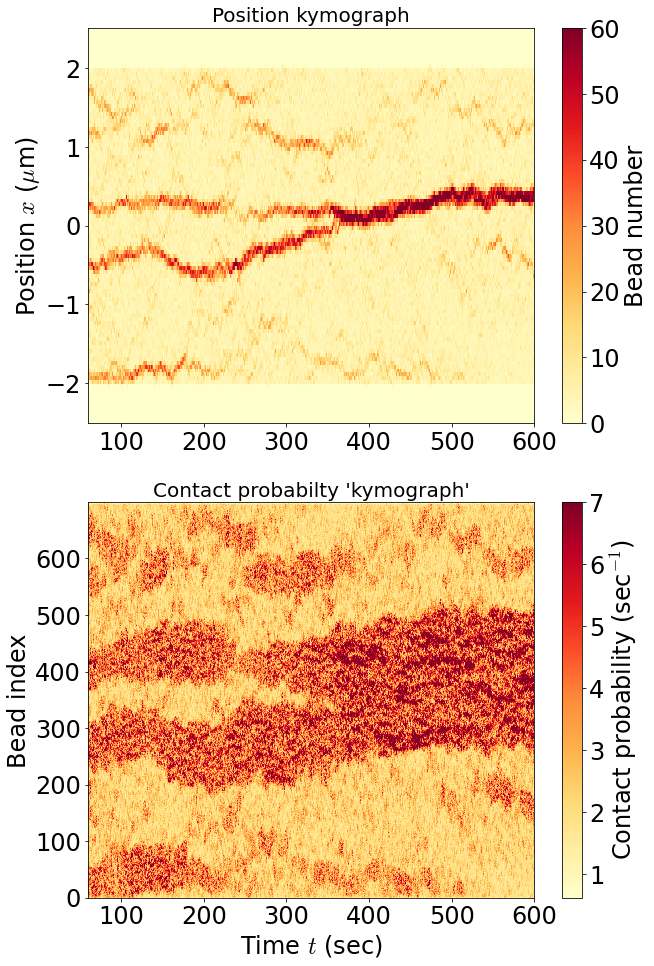

In [177]:
y = bin_edges
# Add extra time point
x = np.append(time_arr, [time_arr[-1] + time_arr[2] - time_arr[1]])
X, Y = np.meshgrid(x, y)
fig, axarr = plt.subplots(2,1, figsize=(10,16))

_ = axarr[0].set_title(
    "Position kymograph")
c0 = axarr[0].pcolorfast(X, Y, hist_arr.T, vmax=60)
_ = fig.colorbar(c0, ax=axarr[0],
                 label=r"Bead number")
_= axarr[0].set_ylabel("Position $x$ ($\mu$m)")
y = np.arange(total_smoothed_contact_kymo.shape[0] + 1)
X, Y = np.meshgrid(x, y)

c1 = axarr[1].pcolorfast(X, Y, contact_kymo, vmax=7)
_ = fig.colorbar(c1, ax=axarr[1],
                 label=r"Contact probability (sec$^{-1}$)")
_ = axarr[1].set_title(
    "Contact probabilty 'kymograph'")
_ = axarr[1].set_xlabel("Time $t$ (sec)")
_= axarr[1].set_ylabel("Bead index")
# axarr[1].plot(y[:-1], hist_arr[0, :])
# axarr[1].plot(y[:-1], hist_arr[1000, :])
# axarr[1].plot(y[:-1], hist_arr[2000, :])
# axarr[1].plot(y[:-1], hist_arr[3000, :])
# axarr[1].plot(y[:-1], hist_arr[4000, :])
# axarr[1].plot(y[:-1], hist_arr[5000, :])
# axarr[1].plot(y[:-1], hist_arr[5400, :])

# Conclusions and Next Steps